# 1. Import Libraries

In [1]:
# !pip install opencv-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from PIL import Image
import cv2
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [3]:
classes = ['freshapples', 'freshbanana', 'freshoranges', 
           'rottenapples', 'rottenbanana', 'rottenoranges']

In [4]:
X = np.empty([0, 32*32*3])
y = np.empty([0, 1])

for _class in tqdm(classes):
    img_path = glob('dataset/' + _class + '/*')
    for path in tqdm(img_path):
        img = Image.open(path)
        img = img.resize((32, 32))
        img = np.array(img)
        if img.shape[2] == 4:
            img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
        img = img.reshape(1, -1)
        X = np.vstack([X, img])
        y = np.vstack([y, _class])

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2088 [00:00<?, ?it/s]

  0%|          | 0/1962 [00:00<?, ?it/s]

  0%|          | 0/1854 [00:00<?, ?it/s]

  0%|          | 0/2342 [00:00<?, ?it/s]

  0%|          | 0/2754 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

# ### 3. Clean Data

# 4. Split Dataset into Traning & Test Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# ### 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [6]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [7]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

In [8]:
##### logistic regression #####
# clf = LogisticRegression(penalty='none')
# clf.fit(X_train_scaled, y_train)


##### logistic regression with l2 regularization #####
# alphas = np.logspace(-3, 3, num=100)
# clf = LogisticRegressionCV(penalty='l2', Cs=alphas, cv=5)
# clf.fit(X_train_scaled, y_train)


##### logistic regression with l1 regularization #####
# alphas = np.logspace(-3, 3, num=100)
# clf = LogisticRegressionCV(penalty='l1', solver='saga', Cs=alphas, cv=5)
# clf.fit(X_train_scaled, y_train)


##### logistic regression with elastic net regularization #####
# alphas = np.logspace(-3, 3, num=100)
# l1_ratios = [0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
# clf = LogisticRegressionCV(penalty='elasticnet', solver='saga', 
#                            l1_ratios=l1_ratios, Cs=alphas, cv=5)
# clf.fit(X_train_scaled, y_train)


##### logistic regression + balanced class weight #####
# clf = LogisticRegression(penalty='none', class_weight='balanced')
# clf.fit(X_train_scaled, y_train)


##### logistic regression with l2 regularization + balanced class weight #####
# alphas = np.logspace(-3, 3, num=100)
# clf = LogisticRegressionCV(penalty='l2', Cs=alphas, cv=5, class_weight='balanced')
# clf.fit(X_train_scaled, y_train)


##### logistic regression with l1 regularization + balanced class weight #####
# alphas = np.logspace(-3, 3, num=100)
# clf = LogisticRegressionCV(penalty='l1', solver='saga', Cs=alphas, cv=5, class_weight='balanced')
# clf.fit(X_train_scaled, y_train)


##### logistic regression with elastic net regularization + balanced class weight #####
# alphas = np.logspace(-3, 3, num=100)
# l1_ratios = [0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
# clf = LogisticRegressionCV(penalty='elasticnet', solver='saga', 
#                            l1_ratios=l1_ratios, Cs=alphas, cv=5, class_weight='balanced')
# clf.fit(X_train_scaled, y_train)

## 6.1. Setting Parameters

In [9]:
clf = LogisticRegression(penalty='none', class_weight='balanced')

## 6.2. Train Model

In [10]:
clf.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', penalty='none')

## 6.3. Model's Weight & Bias

In [11]:
clf.coef_

array([[-0.03229292, -0.02991332, -0.03437828, ..., -0.01594043,
        -0.00801819, -0.00914297],
       [ 0.0527228 ,  0.05989674,  0.05328787, ..., -0.01106724,
         0.00147206, -0.00968525],
       [ 0.00719476,  0.01163837,  0.03835891, ..., -0.01588917,
        -0.00684946,  0.02792536],
       [ 0.00678349,  0.00675829,  0.00479473, ...,  0.04835327,
         0.04176391,  0.04962849],
       [-0.07965631, -0.09543326, -0.11350885, ..., -0.05341252,
        -0.07396659, -0.10219718],
       [ 0.04524817,  0.04705317,  0.05144561, ...,  0.04795609,
         0.04559827,  0.04347156]])

In [12]:
clf.intercept_

array([ 0.04861519, -0.71187496, -0.17163912, -0.08139537,  0.69762457,
        0.21866969])

# 7. Prediction

## 7.1. Training Set

In [13]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [14]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

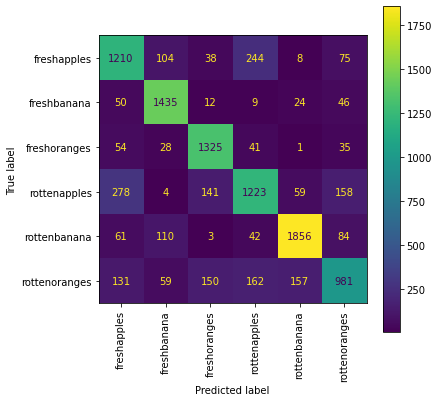

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(clf, X_train_scaled, y_train, ax=ax)
plt.xticks(rotation=90)
plt.show()

### 8.1.2. Scoring

In [16]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [17]:
print('accuracy =', report['accuracy'])

accuracy = 0.7722638969032506


In [18]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
freshapples,0.678251,0.720667,0.698816,1679.000000
freshbanana,0.824713,0.910533,0.865501,1576.000000
freshoranges,0.793889,0.892857,0.840469,1484.000000
rottenapples,0.710633,0.656468,0.682478,1863.000000
rottenbanana,0.881710,0.860853,0.871157,2156.000000
rottenoranges,0.711385,0.598171,0.649884,1640.000000
accuracy,0.772264,0.772264,0.772264,0.772264
macro avg,0.766763,0.773258,0.768051,10398.000000
weighted avg,0.770168,0.772264,0.769386,10398.000000


## 8.2. Test Set

### 8.2.1. Confusion Matrix

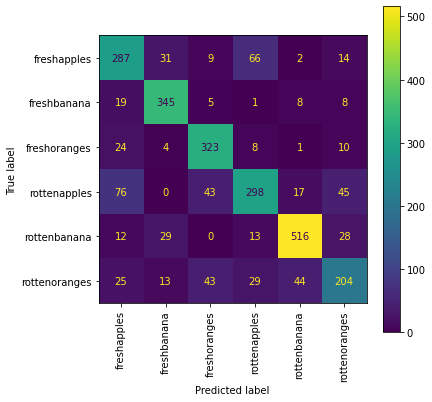

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(clf, X_test_scaled, y_test, ax=ax)
plt.xticks(rotation=90)
plt.show()

### 8.2.2. Scoring

In [20]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [21]:
print('accuracy =', report['accuracy'])

accuracy = 0.7588461538461538


In [22]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
freshapples,0.647856,0.701711,0.673709,409.000000
freshbanana,0.817536,0.893782,0.853960,386.000000
freshoranges,0.763593,0.872973,0.814628,370.000000
rottenapples,0.718072,0.622129,0.666667,479.000000
rottenbanana,0.877551,0.862876,0.870152,598.000000
rottenoranges,0.660194,0.569832,0.611694,358.000000
accuracy,0.758846,0.758846,0.758846,0.758846
macro avg,0.747467,0.753884,0.748468,2600.000000
weighted avg,0.756982,0.758846,0.755869,2600.000000


# 9. Save Model

In [23]:
import pickle

In [24]:
pickle.dump((clf, scaler), open('fruit_industry_model.pickle', 'wb'))